In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.dates as mdates
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

#### Ques 16.3

In [2]:
# Load the CSV file
file_path = r"E:\Michaelmas\BU7155-Business Data Mining\Homework\DMBA-R-datasets\DMBA-R-datasets\DepartmentStoreSales.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data 
print(data.head())

   Quarter  Sales
0        1  50147
1        2  49325
2        3  57048
3        4  76781
4        5  48617


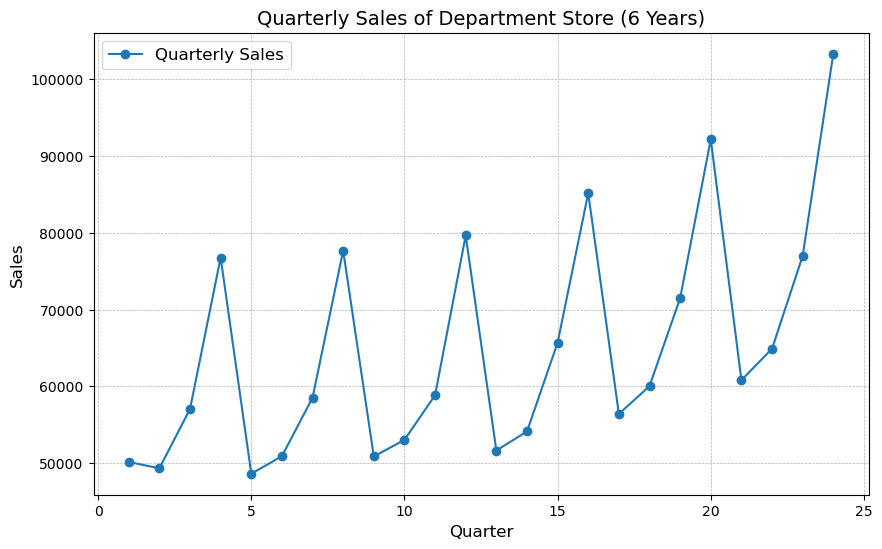

In [3]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data['Quarter'], data['Sales'], marker='o', linestyle='-', label='Quarterly Sales')
plt.title('Quarterly Sales of Department Store (6 Years)', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

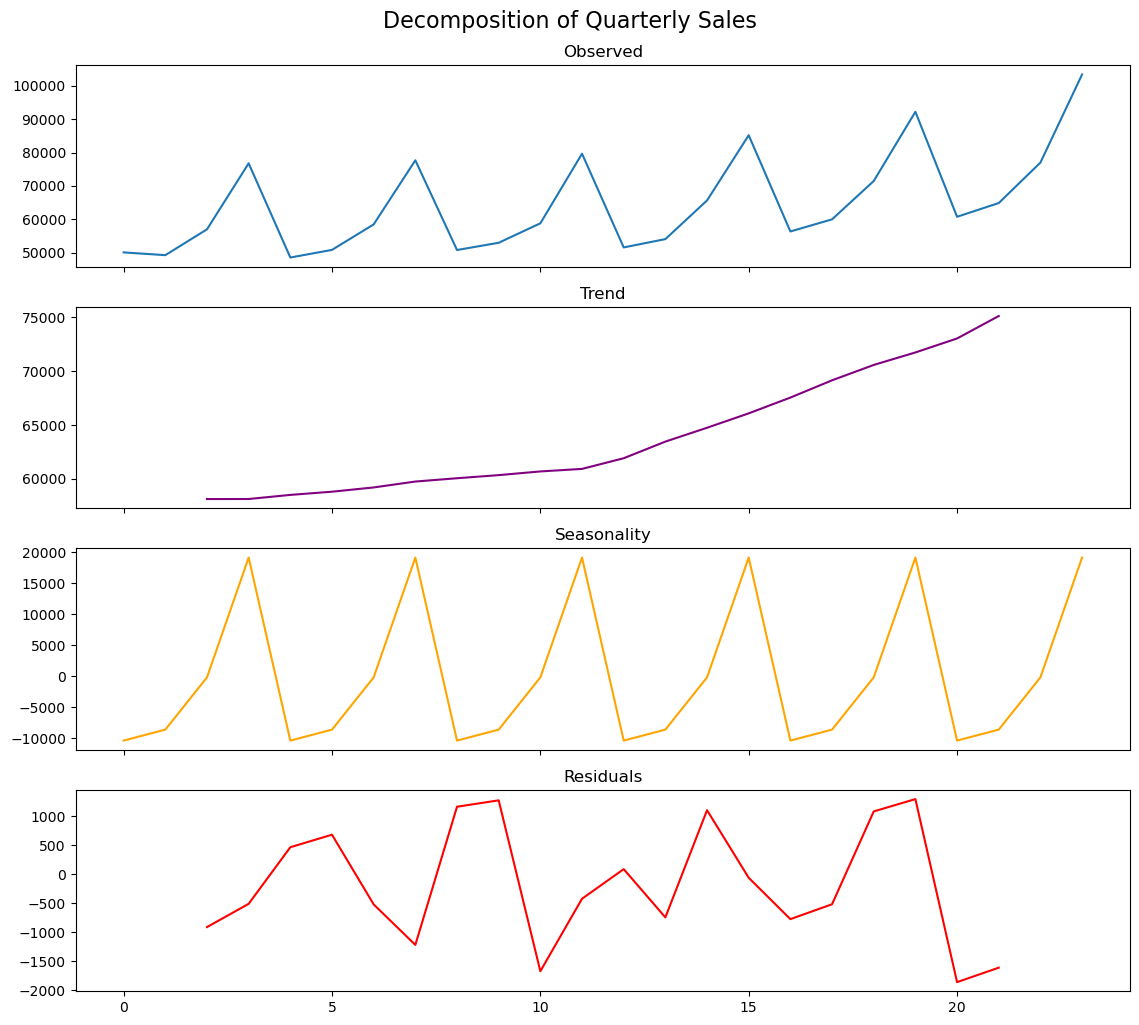

In [4]:
# Decomposing the time series
data.reset_index(drop=True, inplace=True)

# Perform decomposition
decomposition = seasonal_decompose(data['Sales'], model='additive', period=4)

# Plot the decomposition components
fig, axes = plt.subplots(4, 1, figsize=(11.5, 10), sharex=True)
axes[0].plot(decomposition.observed, label='Observed')
axes[0].set_title('Observed')
axes[1].plot(decomposition.trend, label='Trend', color='purple')
axes[1].set_title('Trend')
axes[2].plot(decomposition.seasonal, label='Seasonality', color='orange')
axes[2].set_title('Seasonality')
axes[3].plot(decomposition.resid, label='Residuals', color='red')
axes[3].set_title('Residuals')
plt.tight_layout()
plt.suptitle('Decomposition of Quarterly Sales', fontsize=16, y=1.02)
plt.show()

In [5]:
# Level
average_level = decomposition.observed.mean()
average_level

64757.375

In [6]:
# Extract residuals from the decomposition
residuals = decomposition.resid

# Calculate the mean of the residuals (noise)
residual_mean = residuals.mean()

# Display the result
print(f"The mean of the residuals (noise) is: {residual_mean}")

The mean of the residuals (noise) is: -181.40625000000057


#### Ques 16.4

In [7]:
# Reading the Appliance shipments file
shipments_df = pd.read_csv(r"E:\Michaelmas\BU7155-Business Data Mining\Homework\DMBA-R-datasets\DMBA-R-datasets\ApplianceShipments.csv")

In [8]:
shipments_df.head()

,Quarter,Shipments
0,Q1-1985,4009
1,Q2-1985,4321
2,Q3-1985,4224
3,Q4-1985,3944
4,Q1-1986,4123


In [9]:
# Convert Quarter column to datetime format (e.g., '1985-Q1' to proper dates)
shipments_df['Quarter'] = (shipments_df['Quarter']).astype(str)


In [10]:
# Map quarters to months
quarter_to_month = {
    'Q1': '01',  # January
    'Q2': '04',  # April
    'Q3': '07',  # July
    'Q4': '10'   # October
}

# Convert 'Quarter' to datetime
shipments_df['Quarter'] = shipments_df['Quarter'].apply(
    lambda x: pd.to_datetime(x.split('-')[1] + '-' + quarter_to_month[x.split('-')[0]])
)

In [11]:
shipments_df.head()

,Quarter,Shipments
0,1985-01-01,4009
1,1985-04-01,4321
2,1985-07-01,4224
3,1985-10-01,3944
4,1986-01-01,4123


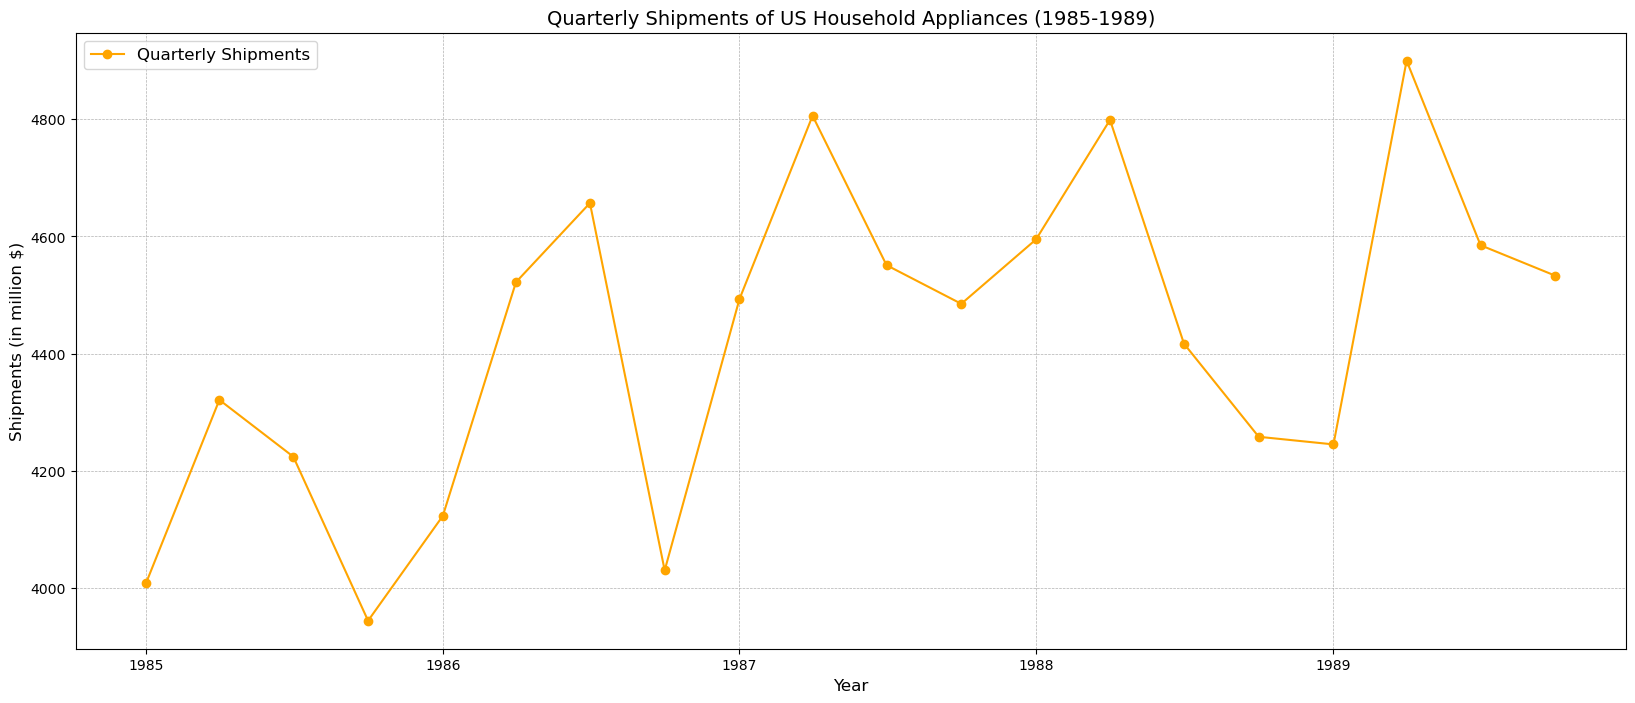

In [12]:
# Plotting the time series
plt.figure(figsize=(20, 8))
plt.plot(shipments_df['Quarter'], shipments_df['Shipments'], marker='o', linestyle='-', label='Quarterly Shipments', color= 'orange')
plt.title('Quarterly Shipments of US Household Appliances (1985-1989)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Shipments (in million $)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

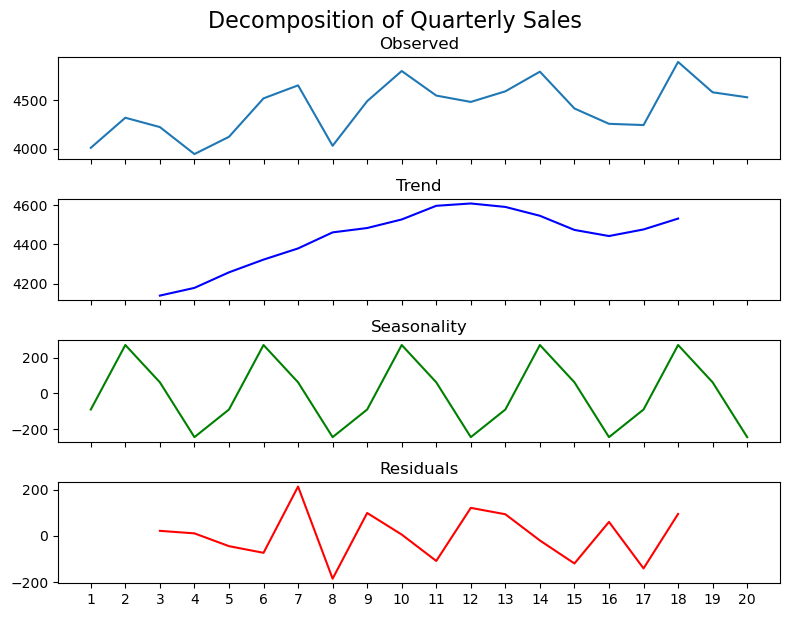

In [13]:
# Perform decomposition
decomposition = seasonal_decompose(shipments_df['Shipments'], model='additive', period=4)

# Plot the decomposition components
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

# Plot each component with appropriate labels
axes[0].plot(decomposition.observed, label='Observed')
axes[0].set_title('Observed')

axes[1].plot(decomposition.trend, label='Trend', color='blue')
axes[1].set_title('Trend')

axes[2].plot(decomposition.seasonal, label='Seasonality', color='green')
axes[2].set_title('Seasonality')

axes[3].plot(decomposition.resid, label='Residuals', color='red')
axes[3].set_title('Residuals')

# x-axis has whole numbers for quarters
plt.xticks(ticks=range(len(shipments_df['Shipments'])), labels=range(1, len(shipments_df['Shipments']) + 1))
plt.tight_layout()
plt.suptitle('Decomposition of Quarterly Sales', fontsize=16, y=1.02)
plt.show()

In [14]:
# Level
average_level = decomposition.observed.mean()
average_level

4424.85

In [15]:
# Extract residuals from the decomposition
residuals = decomposition.resid

# Calculate the mean of the residuals (noise)
residual_mean = residuals.mean()

# Display the result
print(f"The mean of the residuals (noise) is: {residual_mean}")

The mean of the residuals (noise) is: 2.3515625


#### Ques 16.5

In [16]:
work_hours_df = pd.read_csv(r"E:\Michaelmas\BU7155-Business Data Mining\Homework\DMBA-R-datasets\DMBA-R-datasets\CanadianWorkHours.csv")

In [17]:
work_hours_df.head()

,Year,Hours
0,1966,37.2
1,1967,37.0
2,1968,37.4
3,1969,37.5
4,1970,37.7


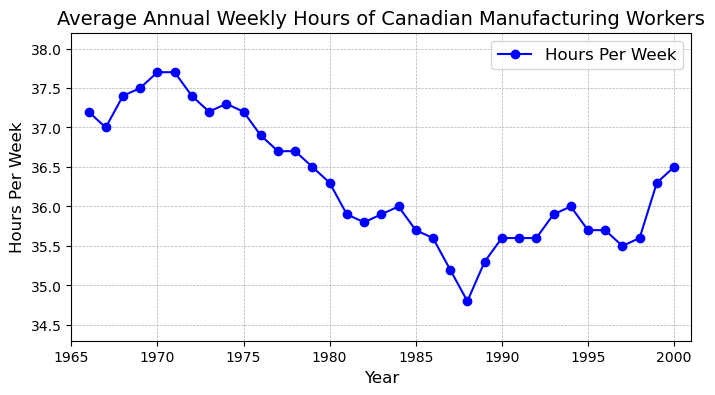

In [18]:
# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(work_hours_df['Year'], work_hours_df['Hours'], marker='o', linestyle='-', color='blue', label='Hours Per Week')

# Adjust axes
plt.xlim(work_hours_df['Year'].min() - 1, work_hours_df['Year'].max() + 1)  # Add padding to x-axis
plt.ylim(work_hours_df['Hours'].min() - 0.5, work_hours_df['Hours'].max() + 0.5)  # Add padding to y-axis

# Add labels, title, and grid
plt.title('Average Annual Weekly Hours of Canadian Manufacturing Workers', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Hours Per Week', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.show()

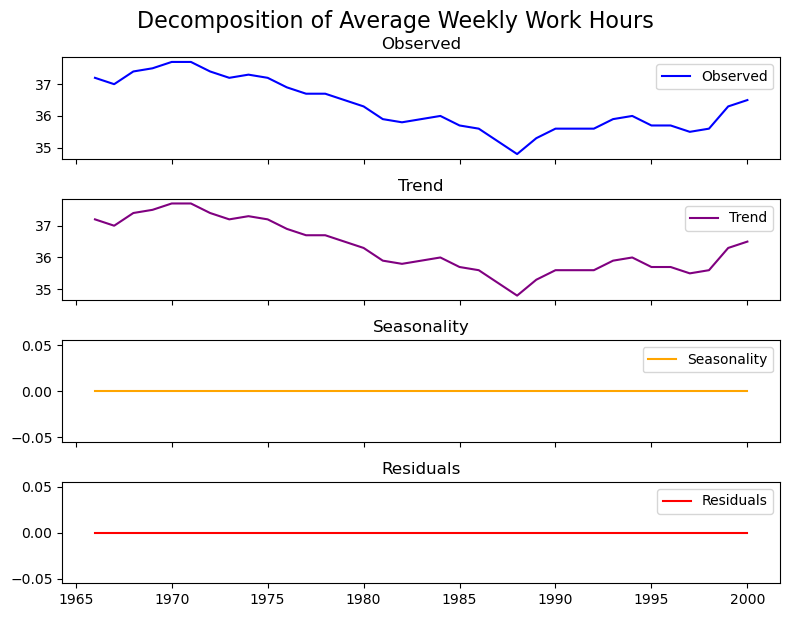

In [19]:
# Set 'Year' as the index and ensure it's treated as a time series
work_hours_df.set_index('Year', inplace=True)

# Decompose the time series
decomposition = seasonal_decompose(work_hours_df['Hours'], model='additive', period=1)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)

axes[0].plot(decomposition.observed, label='Observed', color='blue')
axes[0].set_title('Observed')
axes[0].legend()

axes[1].plot(decomposition.trend, label='Trend', color='purple')
axes[1].set_title('Trend')
axes[1].legend()

axes[2].plot(decomposition.seasonal, label='Seasonality', color='orange')
axes[2].set_title('Seasonality')
axes[2].legend()

axes[3].plot(decomposition.resid, label='Residuals', color='red')
axes[3].set_title('Residuals')
axes[3].legend()

plt.tight_layout()
plt.suptitle('Decomposition of Average Weekly Work Hours', fontsize=16, y=1.02)
plt.show()

In [20]:
# Level
average_level = decomposition.observed.mean()
average_level

36.311428571428564

In [21]:
# Extract residuals from the decomposition
residuals = decomposition.resid

# Calculate the mean of the residuals (noise)
residual_mean = residuals.mean()

# Display the result
print(f"The mean of the residuals (noise) is: {residual_mean}")

The mean of the residuals (noise) is: 0.0


#### Ques 16.6

In [22]:
souvenir_sales_df = pd.read_csv(r"E:\Michaelmas\BU7155-Business Data Mining\Homework\DMBA-R-datasets\DMBA-R-datasets\SouvenirSales.csv")

In [23]:
souvenir_sales_df.head()

,Date,Sales
0,Jan-95,1664.81
1,Feb-95,2397.53
2,Mar-95,2840.71
3,Apr-95,3547.29
4,May-95,3752.96


In [24]:
souvenir_sales_df.dtypes

Date      object
Sales    float64
dtype: object

In [25]:
# Convert 'Date' column to datetime format and sort the data by date
souvenir_sales_df['Date_sales'] = pd.to_datetime(souvenir_sales_df['Date'], format='%b-%y')
souvenir_sales_df = souvenir_sales_df.sort_values('Date_sales')

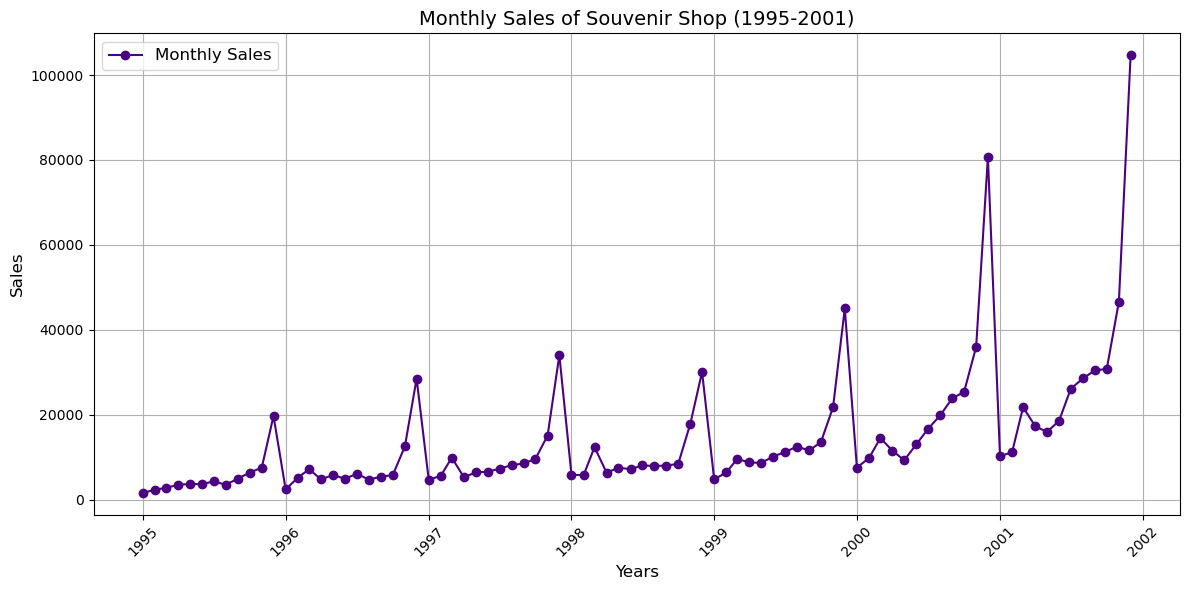

In [26]:
# Plot the time series 
plt.figure(figsize=(12, 6))
plt.plot(souvenir_sales_df['Date_sales'], souvenir_sales_df['Sales'], marker='o', linestyle='-', label='Monthly Sales', color ='indigo')
plt.title('Monthly Sales of Souvenir Shop (1995-2001)', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

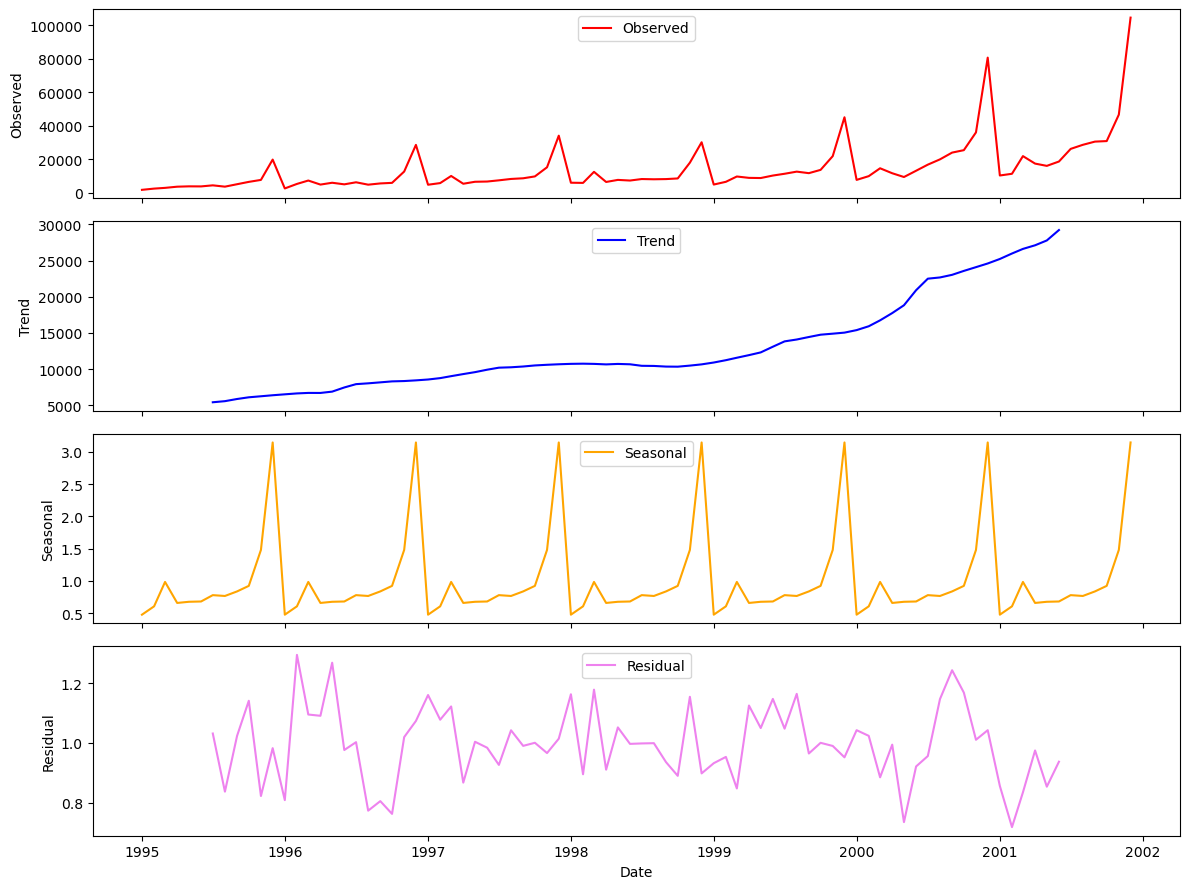

In [27]:
# Decompose the time series
decomposition = seasonal_decompose(souvenir_sales_df['Sales'], model='multiplicative', period=12)

# Plotting decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 9), sharex=True)

# Observed component
axes[0].plot(souvenir_sales_df['Date_sales'], decomposition.observed, label='Observed', color='red')
axes[0].legend(loc='upper center')
axes[0].set_ylabel('Observed')

# Trend component
axes[1].plot(souvenir_sales_df['Date_sales'], decomposition.trend, label='Trend', color='blue')
axes[1].legend(loc='upper center')
axes[1].set_ylabel('Trend')

# Seasonal component
axes[2].plot(souvenir_sales_df['Date_sales'], decomposition.seasonal, label='Seasonal', color='orange')
axes[2].legend(loc='upper center')
axes[2].set_ylabel('Seasonal')

# Residual component
axes[3].plot(souvenir_sales_df['Date_sales'], decomposition.resid, label='Residual', color='violet')
axes[3].legend(loc='upper center')
axes[3].set_ylabel('Residual')

# Format the x-axis with years
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[3].xaxis.set_major_locator(mdates.YearLocator(1))  # Major ticks every year
axes[3].set_xlabel('Date')

# Adjust layout
plt.tight_layout()
plt.show()

In [28]:
# Level
average_level = decomposition.observed.mean()
average_level

14315.58714285714

In [29]:
# Extract residuals from the decomposition
residuals = decomposition.resid

# Calculate the mean of the residuals (noise)
residual_mean = residuals.mean()

# Display the result
print(f"The mean of the residuals (noise) is: {residual_mean}")

The mean of the residuals (noise) is: 0.9936300029204216


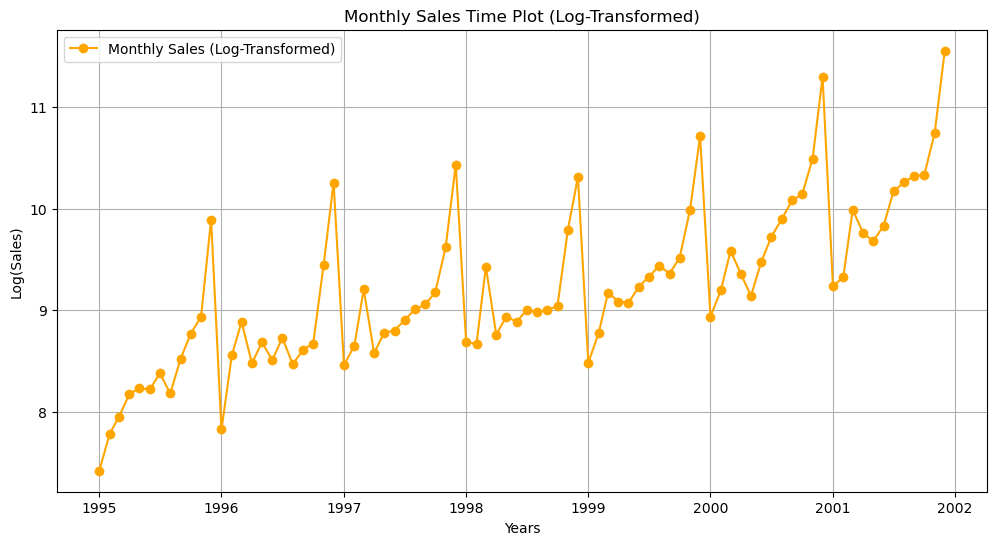

In [30]:
# Log-transform the sales values
souvenir_sales_df['Log_Sales'] = np.log(souvenir_sales_df['Sales'])

# Plot the log-transformed values with a linear y-axis
plt.figure(figsize=(12, 6))
plt.plot(
    souvenir_sales_df['Date_sales'],
    souvenir_sales_df['Log_Sales'],
    marker='o',
    linestyle='-',
    label='Monthly Sales (Log-Transformed)',
    color='orange'
)

plt.title('Monthly Sales Time Plot (Log-Transformed)')
plt.xlabel('Years')
plt.ylabel('Log(Sales)')
plt.grid(True)
plt.legend()
plt.show()

In [31]:
import numpy as np
np.log10(80721.71)

4.906990353373774

In [32]:
# Partitioning the data into training (1995-2000) and validation (2001)
training_data = souvenir_sales_df[souvenir_sales_df['Date_sales'] < '2001-01-01']
validation_data = souvenir_sales_df[souvenir_sales_df['Date_sales'] >= '2001-01-01']

# Displaying the results
print("Training Data (last 5 records): ")
print(training_data[['Date_sales', 'Sales']].tail())

print("\nValidation Data (first 5 records):")
print(validation_data[['Date_sales', 'Sales']].head())

Training Data (last 5 records): 
   Date_sales     Sales
67 2000-08-01  19888.61
68 2000-09-01  23933.38
69 2000-10-01  25391.35
70 2000-11-01  36024.80
71 2000-12-01  80721.71

Validation Data (first 5 records):
   Date_sales     Sales
72 2001-01-01  10243.24
73 2001-02-01  11266.88
74 2001-03-01  21826.84
75 2001-04-01  17357.33
76 2001-05-01  15997.79


#### Ques 16.7

In [33]:
shampoo_sales_df = pd.read_csv(r"E:\Michaelmas\BU7155-Business Data Mining\Homework\DMBA-R-datasets\DMBA-R-datasets\ShampooSales.csv")

In [34]:
shampoo_sales_df.head()

,Month,Shampoo Sales
0,Jan-95,266.0
1,Feb-95,145.9
2,Mar-95,183.1
3,Apr-95,119.3
4,May-95,180.3


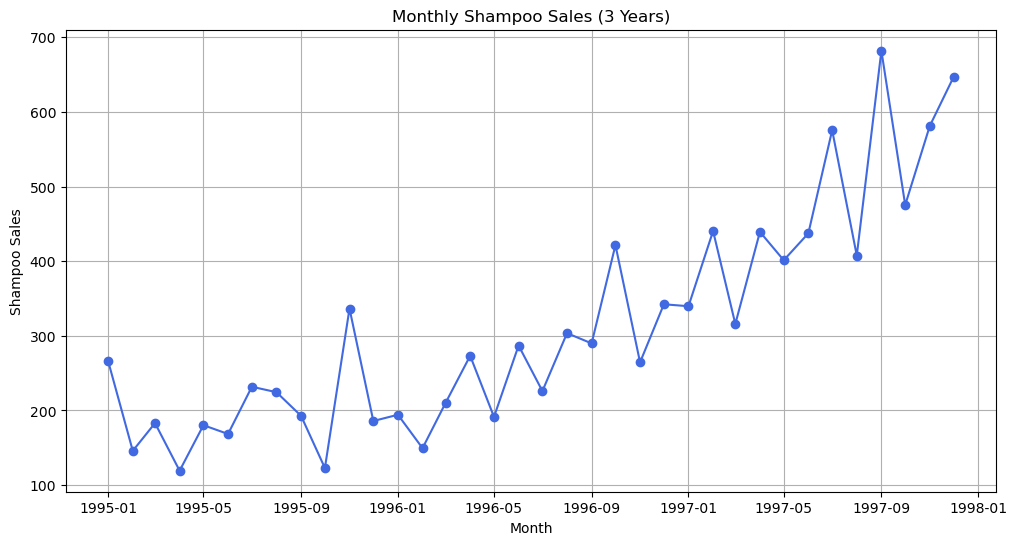

In [35]:
# Convert 'Month' column to datetime
shampoo_sales_df['Month'] = pd.to_datetime(shampoo_sales_df['Month'], format='%b-%y')

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(shampoo_sales_df['Month'], shampoo_sales_df['Shampoo Sales'], marker='o', linestyle='-', color = 'royalblue')
plt.title('Monthly Shampoo Sales (3 Years)')
plt.xlabel('Month')
plt.ylabel('Shampoo Sales')
plt.grid(True)
plt.show()

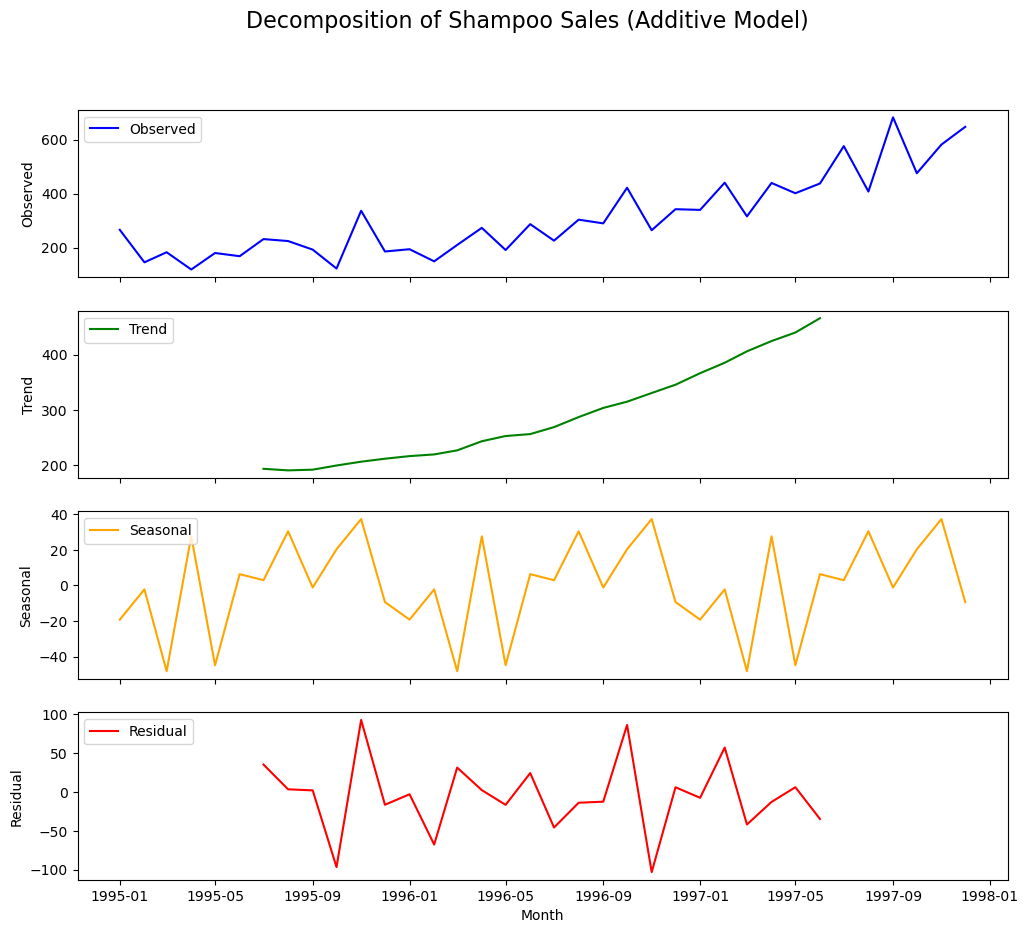

In [36]:
shampoo_sales = shampoo_sales_df.copy()
shampoo_sales.set_index('Month', inplace=True)

# Decompose the time series (additive model)
decomposition = seasonal_decompose(shampoo_sales['Shampoo Sales'], model='additive', period=12)

# Plot the decomposed components with legends and shared x-axis
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Observed
axes[0].plot(decomposition.observed, label='Observed', color='blue')
axes[0].set_ylabel('Observed')
axes[0].legend(loc='upper left')

# Trend
axes[1].plot(decomposition.trend, label='Trend', color='green')
axes[1].set_ylabel('Trend')
axes[1].legend(loc='upper left')

# Seasonal
axes[2].plot(decomposition.seasonal, label='Seasonal', color='orange')
axes[2].set_ylabel('Seasonal')
axes[2].legend(loc='upper left')

# Residual
axes[3].plot(decomposition.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend(loc='upper left')

# Shared x-axis label
axes[3].set_xlabel('Month')

# Display the plot
plt.suptitle('Decomposition of Shampoo Sales (Additive Model)', fontsize=16)
plt.show()

In [37]:
# Level
average_level = decomposition.observed.mean()
average_level

312.59999999999997

In [38]:
# Split the data into training (first 36 months) and test (last 12 months) 
train = shampoo_sales_df.iloc[:-12]
test = shampoo_sales_df.iloc[-12:] 

print("Training Data (last 5 records):")
print(train[['Month', 'Shampoo Sales']].tail())

print("\nTest Data (first 5 records):")
print(test[['Month', 'Shampoo Sales']].head())

Training Data (last 5 records):
        Month  Shampoo Sales
19 1996-08-01          303.6
20 1996-09-01          289.9
21 1996-10-01          421.6
22 1996-11-01          264.5
23 1996-12-01          342.3

Test Data (first 5 records):
        Month  Shampoo Sales
24 1997-01-01          339.7
25 1997-02-01          440.4
26 1997-03-01          315.9
27 1997-04-01          439.3
28 1997-05-01          401.3


Linear Model metrics:

Training MAPE: 20.29%
Training RMSE: 51.14
Validation MAPE: 28.36%
Validation RMSE: 179.63


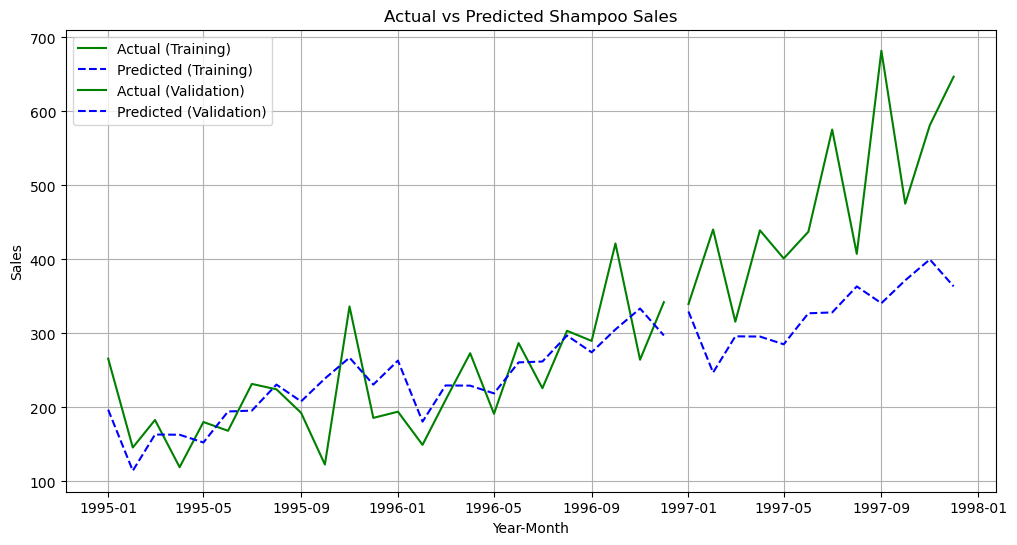

In [39]:
# Convert Month to datetime and create a Time column
shampoo_sales_df['Month'] = pd.to_datetime(shampoo_sales_df['Month'], format="%b-%y")
shampoo_sales_df['Time'] = np.arange(1, len(shampoo_sales_df) + 1)

# Identify the split point for the last 12 months
split_point = len(shampoo_sales_df) - 12

# Create training and validation datasets
train = shampoo_sales_df.iloc[:split_point].copy()
validation = shampoo_sales_df.iloc[split_point:].copy()

# Create MonthFactor column
train['MonthFactor'] = train['Month'].dt.month.astype(str)
validation['MonthFactor'] = validation['Month'].dt.month.astype(str)

# Fit a regression model
model = LinearRegression()
X_train = pd.get_dummies(train[['Time', 'MonthFactor']], drop_first=True)
y_train = train['Shampoo Sales']
model.fit(X_train, y_train)

# Predictions for training set
train['Predicted'] = model.predict(X_train)

# Predictions for validation set
X_validation = pd.get_dummies(validation[['Time', 'MonthFactor']], drop_first=True)
validation['Predicted'] = model.predict(X_validation)

def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

# Training metrics
mape_train = calculate_mape(train['Shampoo Sales'], train['Predicted'])
rmse_train = calculate_rmse(train['Shampoo Sales'], train['Predicted'])

# Validation metrics
mape_validation = calculate_mape(validation['Shampoo Sales'], validation['Predicted'])
rmse_validation = calculate_rmse(validation['Shampoo Sales'], validation['Predicted'])

# Print results
print(f"Linear Model metrics:\n")
print(f"Training MAPE: {mape_train:.2f}%")
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Validation MAPE: {mape_validation:.2f}%")
print(f"Validation RMSE: {rmse_validation:.2f}")

# Combine training and validation data for plotting
combined = pd.concat([
    pd.DataFrame({'Set': 'Training', 'Month': train['Month'], 'Actual': train['Shampoo Sales'], 'Predicted': train['Predicted']}),
    pd.DataFrame({'Set': 'Validation', 'Month': validation['Month'], 'Actual': validation['Shampoo Sales'], 'Predicted': validation['Predicted']})
])

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
for key, grp in combined.groupby('Set'):
    plt.plot(grp['Month'], grp['Actual'], label=f"Actual ({key})", color='green')
    plt.plot(grp['Month'], grp['Predicted'], label=f"Predicted ({key})", linestyle='--', color='blue')

plt.title("Actual vs Predicted Shampoo Sales")
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()

Multiplicative Model metrics:

Training MAPE: 18.06%
Training RMSE: 53.47
Validation MAPE: 25.75%
Validation RMSE: 165.51


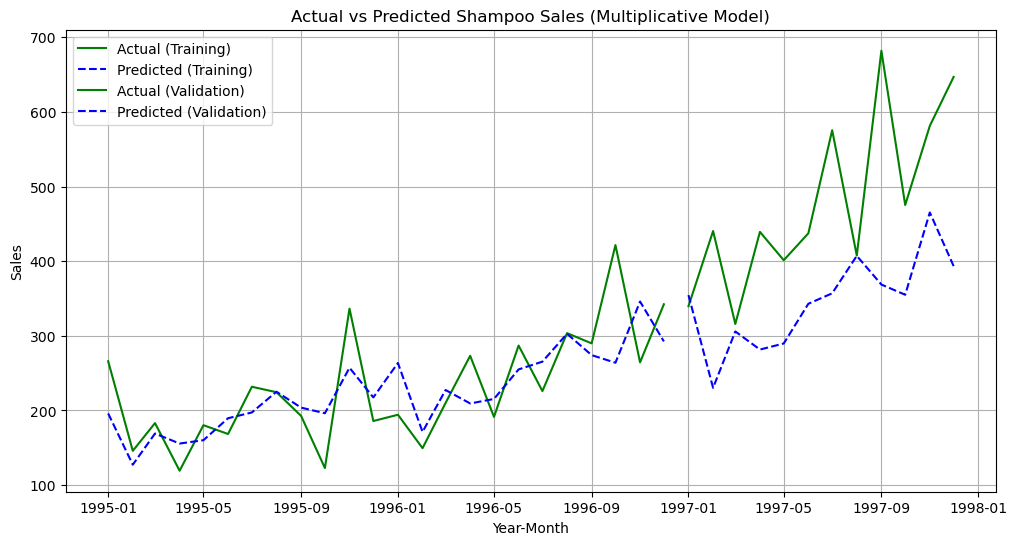

In [40]:
# Log-transform the Sales column
train['Log_Sales'] = np.log(train['Shampoo Sales'])
validation['Log_Sales'] = np.log(validation['Shampoo Sales'])

# Fit a linear regression model on log-transformed data
X_train = pd.get_dummies(train[['Time', 'MonthFactor']], drop_first=True)
y_train_log = train['Log_Sales']

model = LinearRegression()
model.fit(X_train, y_train_log)

# Predictions for training set (log scale)
train['Log_Predicted'] = model.predict(X_train)
train['Predicted'] = np.exp(train['Log_Predicted'])  # Convert back to original scale

# Predictions for validation set (log scale)
X_validation = pd.get_dummies(validation[['Time', 'MonthFactor']], drop_first=True)
validation['Log_Predicted'] = model.predict(X_validation)
validation['Predicted'] = np.exp(validation['Log_Predicted'])  # Convert back to original scale

# Calculate metrics on the original scale
mape_train = calculate_mape(train['Shampoo Sales'], train['Predicted'])
rmse_train = calculate_rmse(train['Shampoo Sales'], train['Predicted'])

mape_validation = calculate_mape(validation['Shampoo Sales'], validation['Predicted'])
rmse_validation = calculate_rmse(validation['Shampoo Sales'], validation['Predicted'])

# Print updated metrics
print(f"Multiplicative Model metrics:\n")
print(f"Training MAPE: {mape_train:.2f}%")
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Validation MAPE: {mape_validation:.2f}%")
print(f"Validation RMSE: {rmse_validation:.2f}")

# Combine training and validation data for plotting
combined = pd.concat([
    pd.DataFrame({'Set': 'Training', 'Month': train['Month'], 'Actual': train['Shampoo Sales'], 'Predicted': train['Predicted']}),
    pd.DataFrame({'Set': 'Validation', 'Month': validation['Month'], 'Actual': validation['Shampoo Sales'], 'Predicted': validation['Predicted']})
])

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))
for key, grp in combined.groupby('Set'):
    plt.plot(grp['Month'], grp['Actual'], label=f"Actual ({key})", color='green')
    plt.plot(grp['Month'], grp['Predicted'], label=f"Predicted ({key})", linestyle='--', color='blue')

plt.title("Actual vs Predicted Shampoo Sales (Multiplicative Model)")
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()
